# Project Overview

# Actually, I used an SVD model, not a hybrid model! Need to update the above!

## Datasets

This project utilizes the MovieLens dataset, a widely used dataset in the field of recommender systems, containing movie ratings and metadata.  The data was obtained at https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data.  There are two data files. The first contains the unique movie Id, movie title and a list of genres the movie falls into.  The second consists of user ratings with the user ID, movie ID, rating and timestap of when the review was made.

## Import Libraries and Read Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette('colorblind')

In [7]:
movies_df = pd.read_csv('../data/movies.csv')

movies_df.shape

(9742, 3)

In [8]:
ratings_df = pd.read_csv('../data/ratings.csv')

ratings_df.shape

(100836, 4)

# Initial EDA

In [10]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [12]:
movies_df.describe(include='all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


Movies Dataframe Summary:
- There are 9,742 unique movies.
- The genres column has 951 unique genre combinations, with 'Drama' being the most frequent.  The number of genres does not appear resaonable, so will conduct further analysis on.
- The movieId ranges from 1 to 193,609, indicating a broad and possibly sparse numbering system, as there are only 9,737 unique movie titles.

In [14]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

There are no missing values in the movies dataset.

In [16]:
movies_df.duplicated().sum()

0

There are no duplicate rows in the movies dataset.

In [18]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [19]:
ratings_df.describe(include='all')

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Ratings Dataframe Summary:
- Contains 100,836 ratings.
- userId ranges from 1 to 610, indicating 610 unique users.
- Ratings range from 0.5 to 5.0, in increments of 0.5.
- The average rating is approximately 3.50.
- timestamp is an integer representing the time the user rating was made.

I will now merge the two datasets which will allow us to see which user rated which movie, along with the movie's title and genres.

In [22]:
# Merge the two df's on movieId
df = movies_df.merge(ratings_df, on='movieId')

df.shape

(100836, 6)

In [23]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [24]:
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [26]:
df.describe(include='all')

,movieId,title,genres,userId,rating,timestamp
count,100836.000000,100836,100836,100836.000000,100836.000000,1.008360e+05
unique,NaN,9719,951,NaN,NaN,NaN
top,NaN,Forrest Gump (1994),Comedy,NaN,NaN,NaN
freq,NaN,329,7196,NaN,NaN,NaN
mean,19435.295718,NaN,NaN,326.127564,3.501557,1.205946e+09
std,35530.987199,NaN,NaN,182.618491,1.042529,2.162610e+08
min,1.000000,NaN,NaN,1.000000,0.500000,8.281246e+08
25%,1199.000000,NaN,NaN,177.000000,3.000000,1.019124e+09
50%,2991.000000,NaN,NaN,325.000000,3.500000,1.186087e+09
75%,8122.000000,NaN,NaN,477.000000,4.000000,1.435994e+09


Combined Dataset Statistics:
- The dataset contains 100,836 ratings for 9,719 unique movies.
- The genres column has 951 unique genre combinations, with 'Comedy' being the most frequent.
- Ratings range from 0.5 to 5.0, with an average of approximately 3.50.

In [28]:
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

There are no missing values in the combined dataset

In [30]:
df.duplicated().sum()

0

## Univariate Analysis

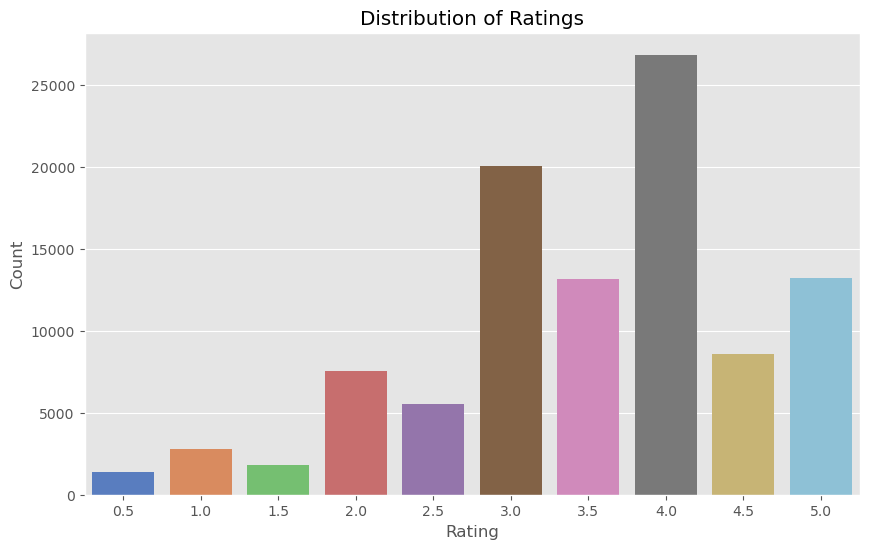

In [32]:
# Plot ratings distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='rating', data=df, legend=False, palette='muted'
             )
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


The distribution of ratings shows that:
- Ratings are discrete, in increments of 0.5.
- The most common ratings are around 3.0 to 4.0, indicating a tendency towards higher ratings.
- The extreme ratings (0.5 and 5.0) are less common, suggesting that users are generally moderate in their assessments.

C:\Users\trobb\AppData\Local\Temp\ipykernel_15172\3179706429.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(genre_counts, kind='bar', palette='muted', height=5, aspect=2)


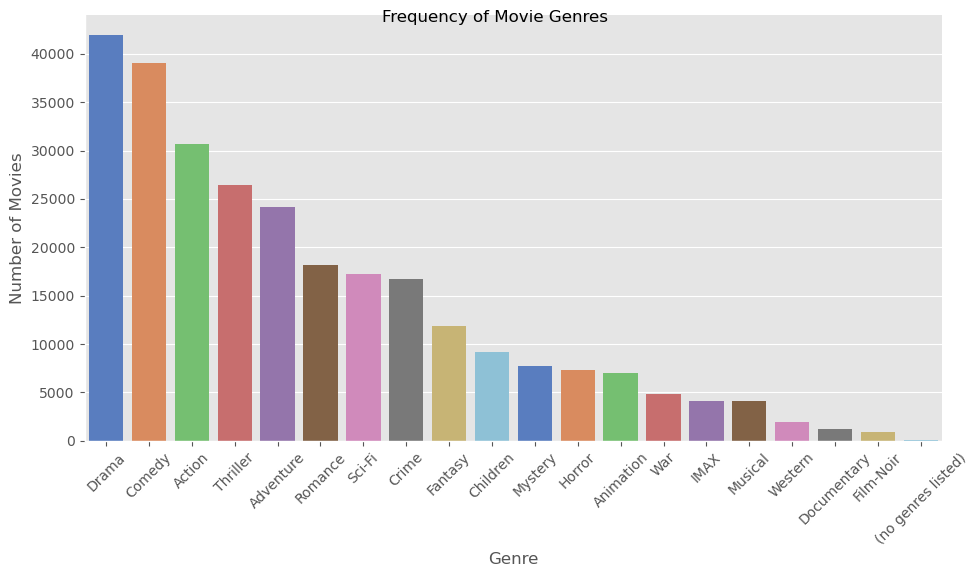

In [34]:
# split genres by | and add as a list
df['genres'] = df['genres'].apply(lambda x:x.split('|'))
                                  
df.head()

# Break out genres included in list and determine count of each
import matplotlib.pyplot as plt

# Explode the genres column to have separate row for each genre
exploded_genres = df.explode('genres')

# Count the occurrences of each genre
genre_counts = exploded_genres['genres'].value_counts()
genre_counts

# Plot the genre frequencies

g = sns.catplot(genre_counts, kind='bar', palette='muted', height=5, aspect=2)
g.fig.suptitle('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

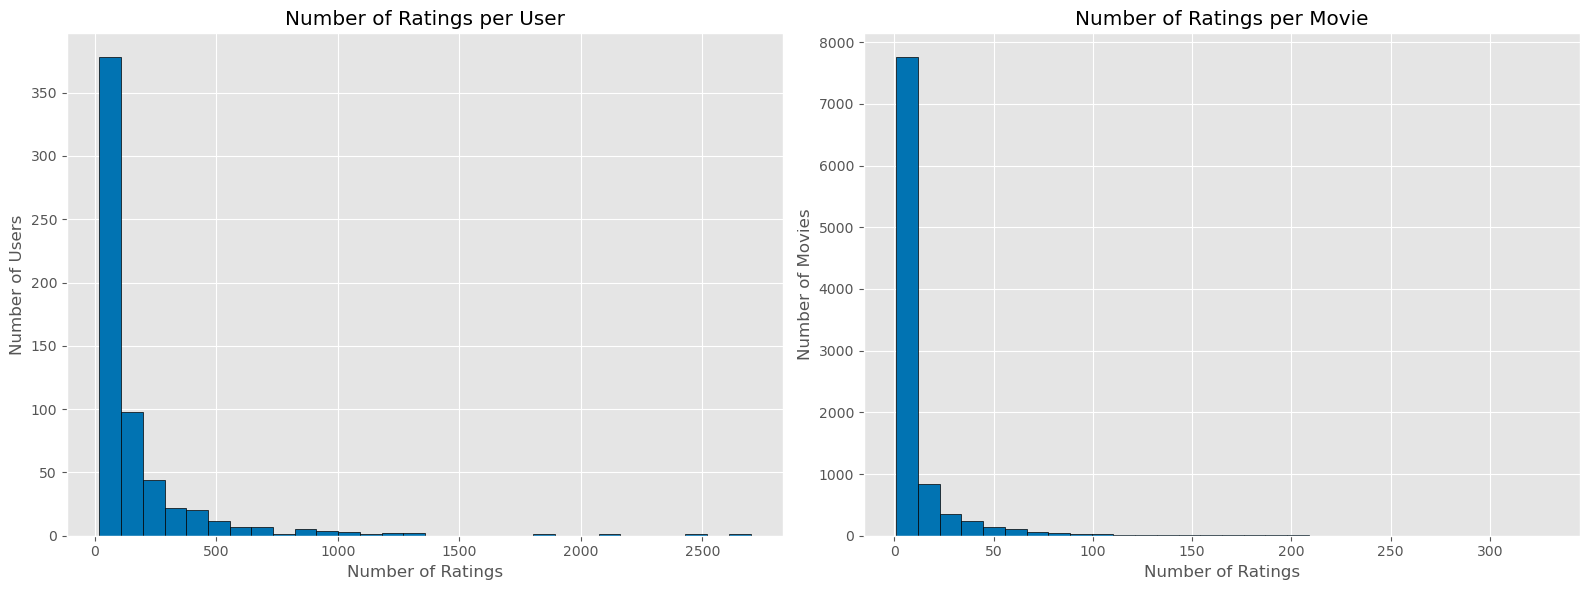

In [36]:
import matplotlib.pyplot as plt

# Assuming 'ratings_df' is your DataFrame
user_rating_counts = ratings_df['userId'].value_counts()
movie_rating_counts = ratings_df['movieId'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for number of ratings per user
axes[0].hist(user_rating_counts, bins=30, edgecolor='black')
axes[0].set_title('Number of Ratings per User')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Number of Users')

# Plot for number of ratings per movie
axes[1].hist(movie_rating_counts, bins=30, edgecolor='black')
axes[1].set_title('Number of Ratings per Movie')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()



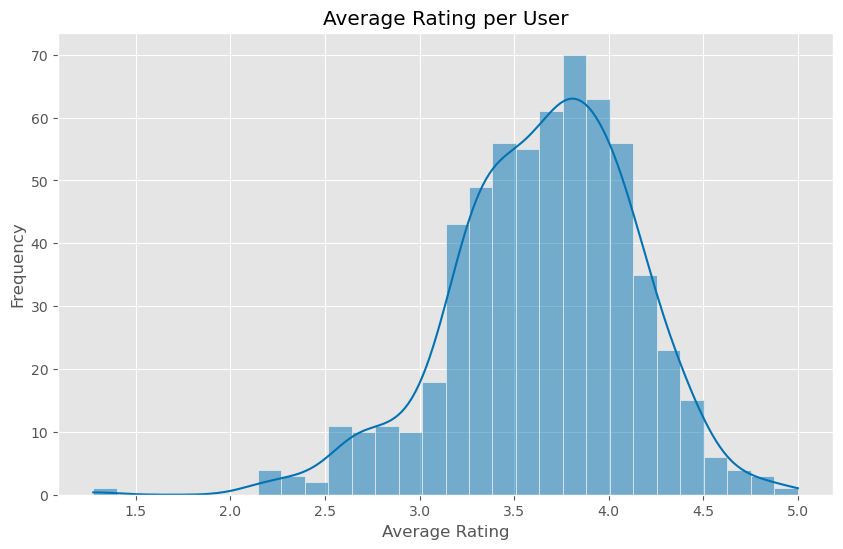

In [37]:
# Average Rating per User

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating per user
user_avg_ratings = ratings_df.groupby('userId')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(user_avg_ratings, bins=30, kde=True)
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


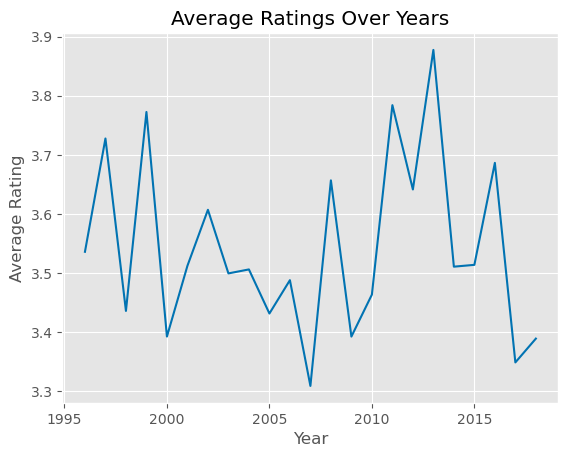

In [38]:
# Ratings over Time
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['datetime'].dt.year
ratings_df.groupby('year')['rating'].mean().plot(kind='line')
plt.title('Average Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


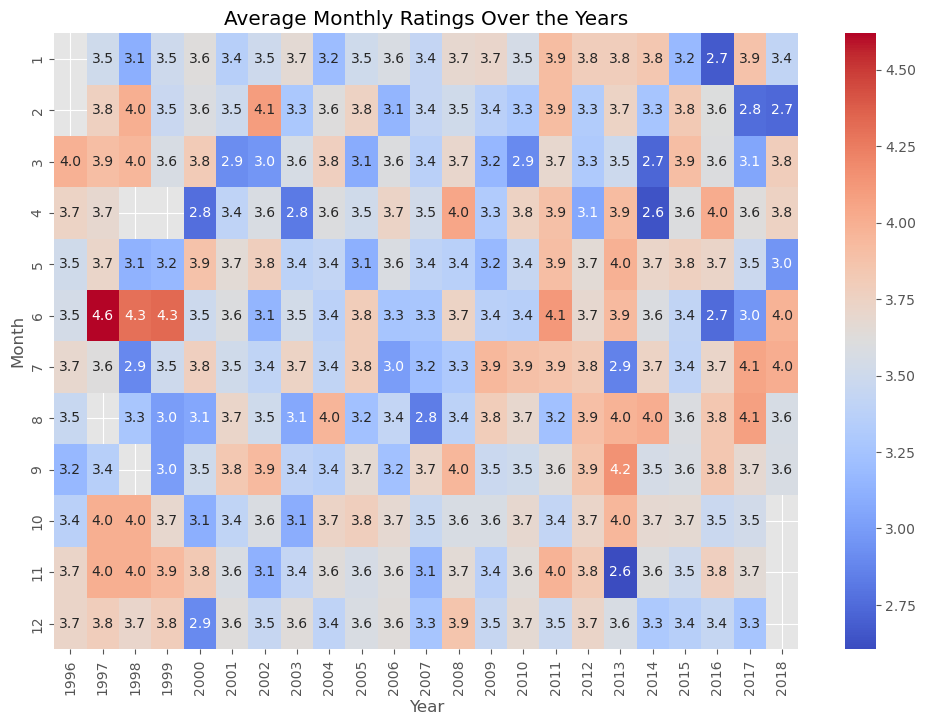

In [39]:
# Heatmap of Ratings Over Time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'timestamp' is a UNIX timestamp in 'ratings_df'
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['date'].dt.year
ratings_df['month'] = ratings_df['date'].dt.month

# Pivot table to prepare data for heatmap
rating_pivot = ratings_df.pivot_table(values='rating', index='month', columns='year', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(rating_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Monthly Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()



In [40]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


# Movie Recommendations

The plot above shows the trend of average movie ratings on a monthly basis. Observing the fluctuations in average ratings over time can provide insights into various factors, such as:
- User Rating Behavior: Changes in average ratings might indicate shifts in user rating behavior or the platform's user base.
- Content Quality: Variations might also reflect the release of particularly popular (or unpopular) movies during certain periods.


**Seasonal Trends in Movie Ratings**
- Average Ratings by Month: The bar chart provides a clear visualization of how average ratings vary by month. Peaks and troughs can suggest periods of high and low engagement or satisfaction, which can be tied to holiday seasons or specific movie releases.
- Genre Popularity by Month: The heatmap shows how different genres perform across months, revealing any seasonal preferences for genres. For example, holiday-themed or blockbuster genres might show distinct patterns during certain months like December or summer months.


In [44]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


# Modeling

Typical Accuracy Levels:

- General Accuracy: It's challenging to state a specific "average accuracy" because it depends highly on the context and the specific system configuration. However, good movie recommendation systems generally achieve:
    - RMSE: Values around 0.8 to 1.2 for rating predictions, with lower values indicating better accuracy.
    - Precision/Recall: Precision and recall can vary, but good systems might achieve over 20-30% precision in top-N recommendations in practical settings.
    - High-Performance Systems: In competitions like the Netflix Prize, the winning entries achieved RMSEs around 0.85, considered very high accuracy in a real-world system.

## Base Model

In [48]:
'''


import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict
from datetime import datetime

def get_top_n(predictions, n=10):
    """
    Returns the top N recommended items for each user, sorted by the estimated rating.

    Args:
        predictions (list of Prediction objects): The list of predictions, as returned by the test method of an algorithm.
        n (int): The number of recommendations to output for each user. Default is 10.

    Returns:
        top_n (dict): A dictionary where keys are user (raw) ids and values are lists of tuples:
                      [(item id, rating estimation), ...] of size n.
    """
    # Initialize the dictionary to hold the top-n items for each user
    top_n = defaultdict(list)
    # Iterate over all predictions
    for uid, iid, true_r, est, _ in predictions:
        # Append the item and its estimated rating to the user's list
        top_n[uid].append((iid, est))
    # Sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def precision_recall_f1_at_k(top_n, truth, k=10, threshold=3.5):
    """
    Calculate precision, recall, and F1-score of the recommendation system based on the top-N recommendations for each user.
    
    Args:
        top_n (dict): A dictionary where the keys are user ids and the values are lists of recommended items (item ids).
        truth (dict): A dictionary where the keys are user ids and the values are lists of tuples (item id, actual rating).
        k (int): The number of top recommendations considered to calculate the metrics (default is 10).
        threshold (float): The rating threshold to consider an item as relevant (default is 3.5).
    
    Returns:
        precisions (dict), recalls (dict), f1_scores (dict): Dictionaries mapping user id to precision, recall, and F1-score.
    """
    # Initialize dictionaries to hold precision, recall, and F1-score
    precisions = dict()
    recalls = dict()
    f1_scores = dict()

    # Iterate over each user's top-N recommendations
    for uid, user_ratings in top_n.items():
        # Find relevant items by checking if their true rating meets the threshold
        relevant_items = set(iid for (iid, actual_rating) in truth[uid] if actual_rating >= threshold)
        # Find predicted items that are in the top-N list
        predicted_items = set(iid for (iid, _) in user_ratings[:k])
        # Count relevant items
        n_rel = len(relevant_items)
        # Count recommended items
        n_rec_k = len(predicted_items)
        # Count relevant and recommended items
        n_rel_and_rec_k = len(relevant_items & predicted_items)

        # Calculate precision
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        # Calculate recall
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
        # Calculate F1-score
        f1_scores[uid] = 2 * (precisions[uid] * recalls[uid]) / (precisions[uid] + recalls[uid]) if (precisions[uid] + recalls[uid]) != 0 else 0

    return precisions, recalls, f1_scores

# Load movie data
movies_df = pd.read_csv('../data/movies.csv')
# Load ratings data
ratings_df = pd.read_csv('../data/ratings.csv')

# Extract year from movie titles and create a new column
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# One-hot encode genres and merge them with the movie DataFrame
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres_dummies, movies_df['year']], axis=1)

# Convert UNIX timestamp to datetime in ratings DataFrame
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['rating_year'] = ratings_df['date'].dt.year
ratings_df['rating_month'] = ratings_df['date'].dt.month

# Aggregate user statistics from ratings data
user_stats = ratings_df.groupby('userId')['rating'].agg(['mean', 'std', 'count'])
user_stats.columns = ['user_avg_rating', 'user_rating_std', 'user_rating_count']

# Aggregate movie statistics from ratings data
item_stats = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count'])
item_stats.columns = ['movie_avg_rating', 'movie_rating_count']

# Merge user and item statistics back into the ratings DataFrame
augmented_ratings_df = pd.merge(ratings_df, movies_df, on='movieId')
augmented_ratings_df = pd.merge(augmented_ratings_df, user_stats, on='userId')
augmented_ratings_df = pd.merge(augmented_ratings_df, item_stats, on='movieId')

# Prepare the data for the Surprise library
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(augmented_ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Initialize and train the SVD algorithm
algo = SVD(random_state=42)
algo.fit(trainset)
predictions = algo.test(testset)

# Evaluate the algorithm with RMSE and MAE
print('RMSE:', accuracy.rmse(predictions))
print('MAE:', accuracy.mae(predictions))

# Generate and evaluate top-N recommendations
top_n = get_top_n(predictions, n=10)  # check different values
truth = defaultdict(list)
for uid, iid, true_r in augmented_ratings_df[['userId', 'movieId', 'rating']].itertuples(index=False):
    truth[uid].append((iid, true_r))

# Calculate and display precision, recall, and F1-score
precisions, recalls, f1_scores = precision_recall_f1_at_k(top_n, truth, k=10, threshold=3.5)
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)
avg_f1 = sum(f1 for f1 in f1_scores.values()) / len(f1_scores)

print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')

'''


'\n\n\nimport pandas as pd\nfrom surprise import Dataset, Reader, SVD, accuracy\nfrom surprise.model_selection import train_test_split\nfrom collections import defaultdict\nfrom datetime import datetime\n\ndef get_top_n(predictions, n=10):\n    """\n    Returns the top N recommended items for each user, sorted by the estimated rating.\n\n    Args:\n        predictions (list of Prediction objects): The list of predictions, as returned by the test method of an algorithm.\n        n (int): The number of recommendations to output for each user. Default is 10.\n\n    Returns:\n        top_n (dict): A dictionary where keys are user (raw) ids and values are lists of tuples:\n                      [(item id, rating estimation), ...] of size n.\n    """\n    # Initialize the dictionary to hold the top-n items for each user\n    top_n = defaultdict(list)\n    # Iterate over all predictions\n    for uid, iid, true_r, est, _ in predictions:\n        # Append the item and its estimated rating to th

## Revised Model - Tuning

In [77]:
'''

import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from collections import defaultdict
from datetime import datetime

# Load movie data
movies_df = pd.read_csv('../data/movies.csv')
# Load ratings data
ratings_df = pd.read_csv('../data/ratings.csv')

# Preprocess data
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres_dummies, movies_df['year']], axis=1)
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['rating_year'] = ratings_df['date'].dt.year
ratings_df['rating_month'] = ratings_df['date'].dt.month
user_stats = ratings_df.groupby('userId')['rating'].agg(['mean', 'std', 'count']).rename(columns={'mean': 'user_avg_rating', 'std': 'user_rating_std', 'count': 'user_rating_count'})
item_stats = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count']).rename(columns={'mean': 'movie_avg_rating', 'count': 'movie_rating_count'})
augmented_ratings_df = pd.merge(pd.merge(ratings_df, movies_df, on='movieId'), user_stats, on='userId')
augmented_ratings_df = pd.merge(augmented_ratings_df, item_stats, on='movieId')

# Setup Surprise
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(augmented_ratings_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Grid Search for SVD
param_grid = {
    'n_factors': [300, 500, 700],
    'n_epochs': [100],
    'lr_all': [0.01],
    'reg_all': [0.1],
    'biased': [True, False]  
    
}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
gs.fit(data)

# Use the best parameters
best_params = gs.best_params['rmse']
algo = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'], biased=True, random_state=42)

algo.fit(trainset)
predictions = algo.test(testset)

# Function to extract the top N predictions for each user
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Function to calculate precision, recall, and F1 score
def precision_recall_f1_at_k(top_n, truth, k=10, threshold=4.0):
    precisions = {}
    recalls = {}
    f1_scores = {}
    for uid, user_ratings in top_n.items():
        relevant_items = {iid for (iid, actual_rating) in truth[uid] if actual_rating >= threshold}
        predicted_items = {iid for (iid, _) in user_ratings[:k]}
        n_rel = len(relevant_items)
        n_rec_k = len(predicted_items)
        n_rel_and_rec_k = len(relevant_items & predicted_items)
        
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel else 0
        f1_scores[uid] = 2 * (precisions[uid] * recalls[uid]) / (precisions[uid] + recalls[uid]) if (precisions[uid] + recalls[uid]) else 0
    
    avg_precision = sum(precisions.values()) / len(precisions)
    avg_recall = sum(recalls.values()) / len(recalls)
    avg_f1 = sum(f1_scores.values()) / len(f1_scores)
    return avg_precision, avg_recall, avg_f1

# Calculate metrics
top_n = get_top_n(predictions, n=25)
truth = defaultdict(list)
for uid, iid, true_r in augmented_ratings_df[['userId', 'movieId', 'rating']].itertuples(index=False):
    truth[uid].append((iid, true_r))
avg_precision, avg_recall, avg_f1 = precision_recall_f1_at_k(top_n, truth, k=25, threshold=4.0)

# Print metrics
print(f'RMSE: {accuracy.rmse(predictions)}')
print(f'MAE: {accuracy.mae(predictions)}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')

print("Best parameters:", best_params)

'''


RMSE: 0.8456
RMSE: 0.845574891174551
MAE:  0.6467
MAE: 0.6467311587619792
Average Precision: 0.6223417345059373
Average Recall: 0.21422852140656298
Average F1 Score: 0.29603036657838677
Best parameters: {'n_factors': 500, 'n_epochs': 100, 'lr_all': 0.01, 'reg_all': 0.1, 'biased': True}


# REVISED CODE

In [178]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import GridSearchCV, train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# Load movie and ratings data
movies_df = pd.read_csv('../data/movies.csv')
ratings_df = pd.read_csv('../data/ratings.csv')

# Preprocess data
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres_dummies, movies_df['year']], axis=1)
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['rating_year'] = ratings_df['date'].dt.year
ratings_df['rating_month'] = ratings_df['date'].dt.month
user_stats = ratings_df.groupby('userId')['rating'].agg(['mean', 'std', 'count']).rename(columns={'mean': 'user_avg_rating', 'std': 'user_rating_std', 'count': 'user_rating_count'})
item_stats = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count']).rename(columns={'mean': 'movie_avg_rating', 'count': 'movie_rating_count'})
augmented_ratings_df = pd.merge(pd.merge(ratings_df, movies_df, on='movieId'), user_stats, on='userId')
augmented_ratings_df = pd.merge(augmented_ratings_df, item_stats, on='movieId')

# Setup Surprise
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(augmented_ratings_df[['userId', 'movieId', 'rating']], reader)

# Grid Search for SVD
param_grid = {
    'n_factors': [500],  # Expanded for demonstration
    'n_epochs': [100],  # Reduced for faster execution
    'lr_all': [0.001],
    'reg_all': [0.01],
    'biased': [True]  
}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
gs.fit(data)

# Use the best parameters found by GridSearchCV
best_params = gs.best_params['rmse']
algo = SVD(**best_params, random_state=42)
trainset = data.build_full_trainset()
algo.fit(trainset)

# Get predictions
testset = trainset.build_testset()
predictions = algo.test(testset)

# Function to extract the top N predictions for each user
def get_top_n(predictions, n=25):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=200)

# Calculate metrics
truth = defaultdict(list)
for uid, iid, true_r in augmented_ratings_df[['userId', 'movieId', 'rating']].itertuples(index=False):
    truth[uid].append((iid, true_r))
avg_precision, avg_recall, avg_f1 = precision_recall_f1_at_k(top_n, truth, k=10, threshold=4.0)

# Print metrics
print(f'Average RMSE: {gs.best_score["rmse"]}')
print(f'Average MAE: {gs.best_score["mae"]}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')
print("Best parameters:", best_params)



Average RMSE: 0.9124215996352163
Average MAE: 0.7047229627412913
Average Precision: 0.9786885245901638
Average Recall: 0.33421589308984095
Average F1 Score: 0.4302260169061554
Best parameters: {'n_factors': 500, 'n_epochs': 100, 'lr_all': 0.001, 'reg_all': 0.01, 'biased': True}


## Evaluating Different k Values

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Assume predictions and truth setup is done
def evaluate_metrics_at_k(predictions, truth, max_k, threshold=4.0):
    results = defaultdict(lambda: {'Precision': [], 'Recall': [], 'F1 Score': []})
    for k in range(1, max_k + 1):
        top_n = get_top_n(predictions, n=k)
        precisions = {}
        recalls = {}
        f1_scores = {}

        for uid, user_ratings in top_n.items():
            relevant_items = set(iid for (iid, actual_rating) in truth[uid] if actual_rating >= threshold)
            predicted_items = set(iid for (iid, _) in user_ratings[:k])

            n_rel = len(relevant_items)
            n_rec_k = len(predicted_items)
            n_rel_and_rec_k = len(relevant_items & predicted_items)

            if n_rec_k > 0:
                precisions[uid] = n_rel_and_rec_k / n_rec_k
            if n_rel > 0:
                recalls[uid] = n_rel_and_rec_k / n_rel
            if (precisions[uid] + recalls[uid]) > 0:
                f1_scores[uid] = 2 * precisions[uid] * recalls[uid] / (precisions[uid] + recalls[uid])

        # Calculate average of each metric
        avg_precision = np.mean(list(precisions.values()))
        avg_recall = np.mean(list(recalls.values()))
        avg_f1 = np.mean(list(f1_scores.values()))

        results[k]['Precision'].append(avg_precision)
        results[k]['Recall'].append(avg_recall)
        results[k]['F1 Score'].append(avg_f1)

    return results

import matplotlib.pyplot as plt

def plot_performance_metrics(results):
    ks = sorted(results.keys())
    precisions = [results[k]['Precision'][0] for k in ks]
    recalls = [results[k]['Recall'][0] for k in ks]
    f1_scores = [results[k]['F1 Score'][0] for k in ks]

    plt.figure(figsize=(12, 6))
    plt.plot(ks, precisions, label='Precision@k', marker='o', linestyle='-', color='blue')
    plt.plot(ks, recalls, label='Recall@k', marker='o', linestyle='-', color='green')
    plt.plot(ks, f1_scores, label='F1 Score@k', marker='o', linestyle='-', color='red')
    plt.title('Performance Metrics at Different k')
    plt.xlabel('k (Top k Recommendations)')
    plt.ylabel('Metric Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'predictions' and 'truth' are already defined
max_k = 10  # Adjust this based on your needs

results = evaluate_metrics_at_k(predictions, truth, max_k)
plot_performance_metrics(results)



KeyError: 442

## Best Model, so far

In [83]:
'''

import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from collections import defaultdict
from datetime import datetime

# Function to extract the top N predictions for each user
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Function to calculate precision, recall, and F1 score
def precision_recall_f1_at_k(top_n, truth, k=10, threshold=3.0):
    precisions = {}
    recalls = {}
    f1_scores = {}
    for uid, user_ratings in top_n.items():
        relevant_items = {iid for (iid, actual_rating) in truth[uid] if actual_rating >= threshold}
        predicted_items = {iid for (iid, _) in user_ratings[:k]}
        n_rel = len(relevant_items)
        n_rec_k = len(predicted_items)
        n_rel_and_rec_k = len(relevant_items & predicted_items)
        
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel else 0
        f1_scores[uid] = 2 * (precisions[uid] * recalls[uid]) / (precisions[uid] + recalls[uid]) if (precisions[uid] + recalls[uid]) else 0
    
    avg_precision = sum(precisions.values()) / len(precisions)
    avg_recall = sum(recalls.values()) / len(recalls)
    avg_f1 = sum(f1_scores.values()) / len(f1_scores)
    return avg_precision, avg_recall, avg_f1

# Load movie data
movies_df = pd.read_csv('../data/movies.csv')
# Load ratings data
ratings_df = pd.read_csv('../data/ratings.csv')

# Preprocess data
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres_dummies, movies_df['year']], axis=1)
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Merge data
user_stats = ratings_df.groupby('userId')['rating'].agg(['mean', 'std', 'count']).rename(columns={'mean': 'user_avg_rating', 'std': 'user_rating_std', 'count': 'user_rating_count'})
item_stats = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count']).rename(columns={'mean': 'movie_avg_rating', 'count': 'movie_rating_count'})
augmented_ratings_df = pd.merge(pd.merge(ratings_df, movies_df, on='movieId'), user_stats, on='userId')
augmented_ratings_df = pd.merge(augmented_ratings_df, item_stats, on='movieId')

# Setup Surprise
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(augmented_ratings_df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Grid Search for SVD
param_grid = {
    'n_factors': [200, 250, 300, 350, 400, 500],
    'n_epochs': [40, 50, 75, 100],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.001, 0.01, 0.02, 0.1]
}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Use the best parameters
best_params = gs.best_params['rmse']
algo = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'], random_state=42)
algo.fit(trainset)
predictions = algo.test(testset)

# Calculate metrics
top_n = get_top_n(predictions, n=50)
truth = defaultdict(list)
for uid, iid, true_r in augmented_ratings_df[['userId', 'movieId', 'rating']].itertuples(index=False):
    truth[uid].append((iid, true_r))
avg_precision, avg_recall, avg_f1 = precision_recall_f1_at_k(top_n, truth, k=50, threshold=3.0)

# Print metrics
print(f'RMSE: {accuracy.rmse(predictions)}')
print(f'MAE: {accuracy.mae(predictions)}')
print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')


'''

"\n\nimport pandas as pd\nfrom surprise import Dataset, Reader, SVD, accuracy\nfrom surprise.model_selection import train_test_split, GridSearchCV\nfrom collections import defaultdict\nfrom datetime import datetime\n\n# Function to extract the top N predictions for each user\ndef get_top_n(predictions, n=10):\n    top_n = defaultdict(list)\n    for uid, iid, true_r, est, _ in predictions:\n        top_n[uid].append((iid, est))\n    for uid, user_ratings in top_n.items():\n        user_ratings.sort(key=lambda x: x[1], reverse=True)\n        top_n[uid] = user_ratings[:n]\n    return top_n\n\n# Function to calculate precision, recall, and F1 score\ndef precision_recall_f1_at_k(top_n, truth, k=10, threshold=3.0):\n    precisions = {}\n    recalls = {}\n    f1_scores = {}\n    for uid, user_ratings in top_n.items():\n        relevant_items = {iid for (iid, actual_rating) in truth[uid] if actual_rating >= threshold}\n        predicted_items = {iid for (iid, _) in user_ratings[:k]}\n        n

## Manually Tuned Model

In [86]:
'''

import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict
from datetime import datetime

def get_top_n(predictions, n=50):
    """
    Returns the top N recommended items for each user, sorted by the estimated rating.

    Args:
        predictions (list of Prediction objects): The list of predictions, as returned by the test method of an algorithm.
        n (int): The number of recommendations to output for each user. Default is 10.

    Returns:
        top_n (dict): A dictionary where keys are user (raw) ids and values are lists of tuples:
                      [(item id, rating estimation), ...] of size n.
    """
    # Initialize the dictionary to hold the top-n items for each user
    top_n = defaultdict(list)
    # Iterate over all predictions
    for uid, iid, true_r, est, _ in predictions:
        # Append the item and its estimated rating to the user's list
        top_n[uid].append((iid, est))
    # Sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def precision_recall_f1_at_k(top_n, truth, k=50, threshold=3.0):
    """
    Calculate precision, recall, and F1-score of the recommendation system based on the top-N recommendations for each user.
    
    Args:
        top_n (dict): A dictionary where the keys are user ids and the values are lists of recommended items (item ids).
        truth (dict): A dictionary where the keys are user ids and the values are lists of tuples (item id, actual rating).
        k (int): The number of top recommendations considered to calculate the metrics (default is 10).
        threshold (float): The rating threshold to consider an item as relevant (default is 3.5).
    
    Returns:
        precisions (dict), recalls (dict), f1_scores (dict): Dictionaries mapping user id to precision, recall, and F1-score.
    """
    # Initialize dictionaries to hold precision, recall, and F1-score
    precisions = dict()
    recalls = dict()
    f1_scores = dict()

    # Iterate over each user's top-N recommendations
    for uid, user_ratings in top_n.items():
        # Find relevant items by checking if their true rating meets the threshold
        relevant_items = set(iid for (iid, actual_rating) in truth[uid] if actual_rating >= threshold)
        # Find predicted items that are in the top-N list
        predicted_items = set(iid for (iid, _) in user_ratings[:k])
        # Count relevant items
        n_rel = len(relevant_items)
        # Count recommended items
        n_rec_k = len(predicted_items)
        # Count relevant and recommended items
        n_rel_and_rec_k = len(relevant_items & predicted_items)

        # Calculate precision
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        # Calculate recall
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
        # Calculate F1-score
        f1_scores[uid] = 2 * (precisions[uid] * recalls[uid]) / (precisions[uid] + recalls[uid]) if (precisions[uid] + recalls[uid]) != 0 else 0

    return precisions, recalls, f1_scores

# Load movie data
movies_df = pd.read_csv('../data/movies.csv')
# Load ratings data
ratings_df = pd.read_csv('../data/ratings.csv')

# Extract year from movie titles and create a new column
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# One-hot encode genres and merge them with the movie DataFrame
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres_dummies, movies_df['year']], axis=1)

# Convert UNIX timestamp to datetime in ratings DataFrame
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['rating_year'] = ratings_df['date'].dt.year
ratings_df['rating_month'] = ratings_df['date'].dt.month

# Aggregate user statistics from ratings data
user_stats = ratings_df.groupby('userId')['rating'].agg(['mean', 'std', 'count'])
user_stats.columns = ['user_avg_rating', 'user_rating_std', 'user_rating_count']

# Aggregate movie statistics from ratings data
item_stats = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count'])
item_stats.columns = ['movie_avg_rating', 'movie_rating_count']

# Merge user and item statistics back into the ratings DataFrame
augmented_ratings_df = pd.merge(ratings_df, movies_df, on='movieId')
augmented_ratings_df = pd.merge(augmented_ratings_df, user_stats, on='userId')
augmented_ratings_df = pd.merge(augmented_ratings_df, item_stats, on='movieId')

# Prepare the data for the Surprise library
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(augmented_ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Initialize and train the SVD algorithm
algo = SVD(n_factors=400, n_epochs=75, lr_all=0.01, reg_all=0.1, random_state=42) # default values
algo.fit(trainset)
predictions = algo.test(testset)

# Evaluate the algorithm with RMSE and MAE
print('RMSE:', accuracy.rmse(predictions))
print('MAE:', accuracy.mae(predictions))

# Generate and evaluate top-N recommendations
top_n = get_top_n(predictions, n=50)
truth = defaultdict(list)
for uid, iid, true_r in augmented_ratings_df[['userId', 'movieId', 'rating']].itertuples(index=False):
    truth[uid].append((iid, true_r))

# Calculate and display precision, recall, and F1-score
precisions, recalls, f1_scores = precision_recall_f1_at_k(top_n, truth, k=50, threshold=3.0)
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)
avg_f1 = sum(f1 for f1 in f1_scores.values()) / len(f1_scores)

print(f'Average Precision: {avg_precision}')
print(f'Average Recall: {avg_recall}')
print(f'Average F1 Score: {avg_f1}')

'''


'\n\nimport pandas as pd\nfrom surprise import Dataset, Reader, SVD, accuracy\nfrom surprise.model_selection import train_test_split\nfrom collections import defaultdict\nfrom datetime import datetime\n\ndef get_top_n(predictions, n=50):\n    """\n    Returns the top N recommended items for each user, sorted by the estimated rating.\n\n    Args:\n        predictions (list of Prediction objects): The list of predictions, as returned by the test method of an algorithm.\n        n (int): The number of recommendations to output for each user. Default is 10.\n\n    Returns:\n        top_n (dict): A dictionary where keys are user (raw) ids and values are lists of tuples:\n                      [(item id, rating estimation), ...] of size n.\n    """\n    # Initialize the dictionary to hold the top-n items for each user\n    top_n = defaultdict(list)\n    # Iterate over all predictions\n    for uid, iid, true_r, est, _ in predictions:\n        # Append the item and its estimated rating to the 

# Additional EDA

# Model Evaluation

## Additional Cell for Visualization of Precision, Recall, and F1 Score


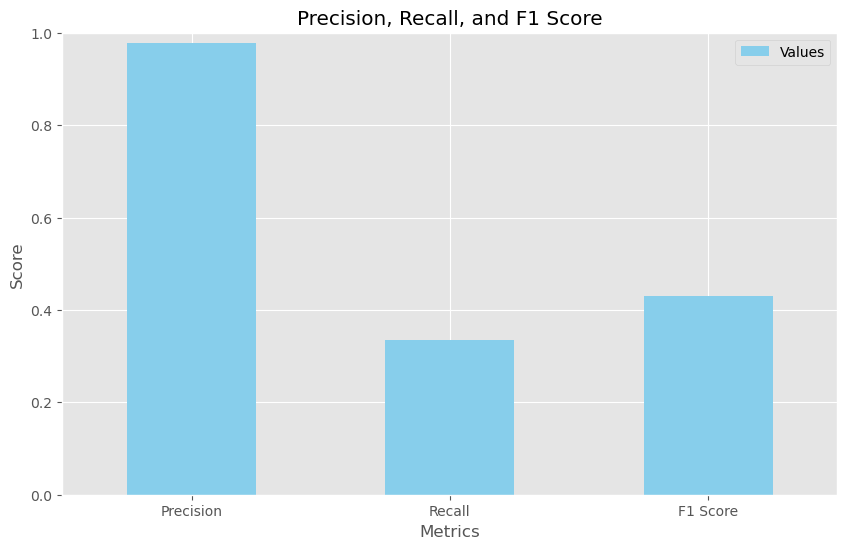

In [166]:
import matplotlib.pyplot as plt

# Visualization of Metrics
metrics_df = pd.DataFrame({
    'Metrics': ['Precision', 'Recall', 'F1 Score'],
    'Values': [avg_precision, avg_recall, avg_f1]
})

# Create a bar plot for precision, recall, and F1 score
metrics_df.set_index('Metrics').plot.bar(rot=0, figsize=(10, 6), color='skyblue')
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1)  # Ensure all values are visible by setting the y-axis limit
plt.show()


## Additional Cell for Error Analysis


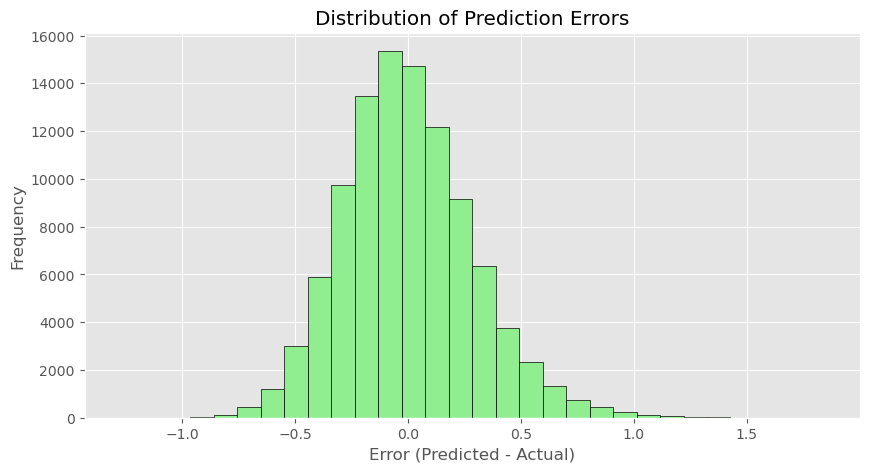

In [168]:
# Error analysis
errors = [pred.est - pred.r_ui for pred in predictions]
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=30, edgecolor='black', color='lightgreen')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()


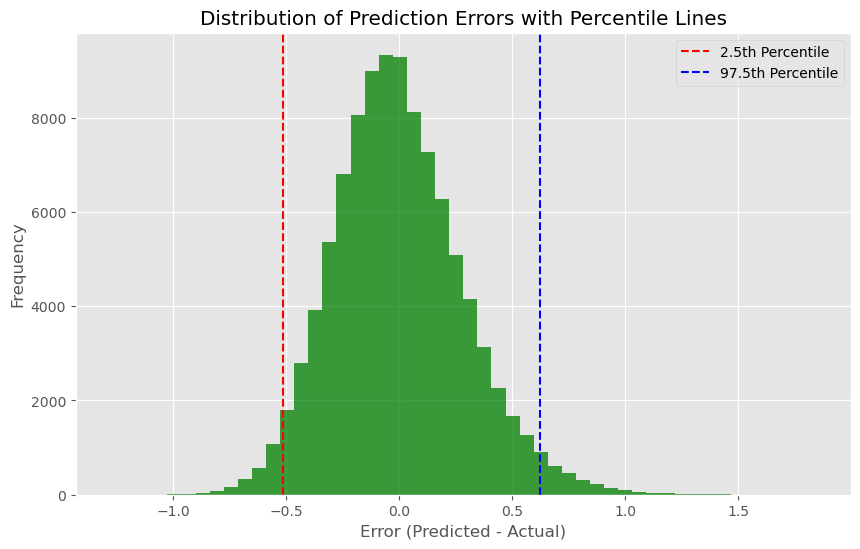

In [170]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from collections import defaultdict
import matplotlib.pyplot as plt

# Assuming the following setup has been done and predictions were obtained:
# your existing setup code goes here

# Calculate prediction errors
errors = [pred.est - pred.r_ui for pred in predictions]

# Calculate the 2.5th and 97.5th percentiles
lower_bound, upper_bound = np.percentile(errors, [2.5, 97.5])

# Plotting the histogram of prediction errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='green', alpha=0.75)
plt.axvline(x=lower_bound, color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(x=upper_bound, color='blue', linestyle='--', label='97.5th Percentile')
plt.title('Distribution of Prediction Errors with Percentile Lines')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Additional Cell for Exploring User Recommendations

In [172]:
# Explore top recommendations for a specific user
user_id = 1  # Change to any user ID of interest
if user_id in top_n:
    user_top_movies = top_n[user_id]
    print(f"Top recommendations for user {user_id}:")
    for movie_id, rating in user_top_movies:
        movie_title = movies_df.loc[movies_df['movieId'] == movie_id, 'title'].values[0]
        print(f"{movie_title} with predicted rating of {rating:.2f}")
else:
    print(f"No recommendations available for user {user_id}")


Top recommendations for user 1:
Schindler's List (1993) with predicted rating of 5.00
Fargo (1996) with predicted rating of 5.00
Citizen Kane (1941) with predicted rating of 5.00
Willy Wonka & the Chocolate Factory (1971) with predicted rating of 5.00
E.T. the Extra-Terrestrial (1982) with predicted rating of 5.00
Monty Python and the Holy Grail (1975) with predicted rating of 5.00
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) with predicted rating of 5.00
Goodfellas (1990) with predicted rating of 5.00
Terminator, The (1984) with predicted rating of 5.00
Back to the Future (1985) with predicted rating of 5.00
L.A. Confidential (1997) with predicted rating of 5.00
Rocky (1976) with predicted rating of 5.00
Matrix, The (1999) with predicted rating of 5.00
American Beauty (1999) with predicted rating of 5.00
Dr. No (1962) with predicted rating of 5.00
Fight Club (1999) with predicted rating of 5.00
Green Mile, The (1999) with predicted rating of 5.00
Wayn

## Additional Cell for Relationship Between Ratings and Recommendations


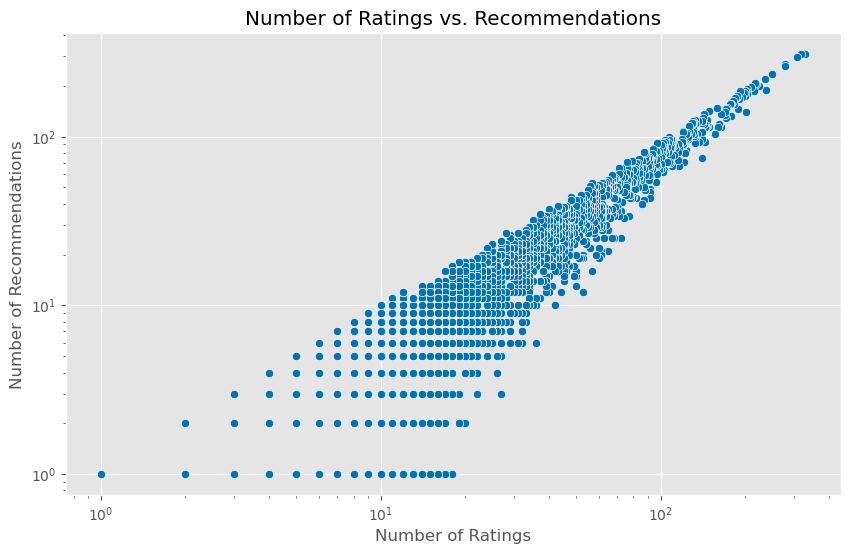

In [174]:
# Analyze the relationship between the number of ratings and recommendations
item_ratings_count = augmented_ratings_df['movieId'].value_counts()
recommended_items = [item for sublist in top_n.values() for (item, _) in sublist]
recommended_counts = pd.Series(recommended_items).value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=item_ratings_count.values, y=recommended_counts.reindex(item_ratings_count.index, fill_value=0).values)
plt.title('Number of Ratings vs. Recommendations')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Recommendations')
plt.xscale('log')
plt.yscale('log')
plt.show()


## Evaluation against industry standards

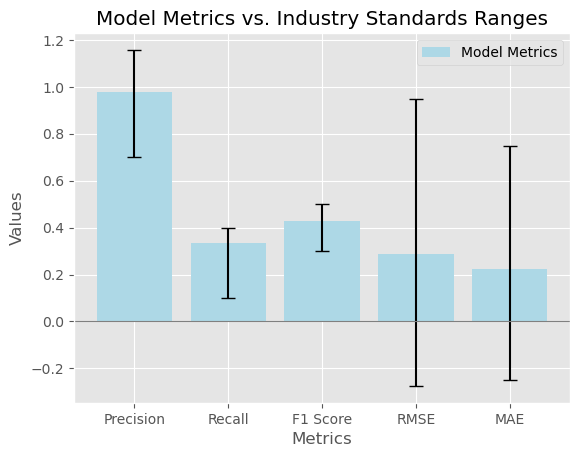

In [176]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from collections import defaultdict
import matplotlib.pyplot as plt

# Assuming predictions are already available from your model
# Calculate RMSE and MAE
rmse_value = accuracy.rmse(predictions, verbose=False)  # Assuming this runs without printing
mae_value = accuracy.mae(predictions, verbose=False)    # Assuming this runs without printing

# Example model metrics (replace with actual values from your analysis)
model_metrics = {
    'Precision': avg_precision,  # replace avg_precision with your actual variable
    'Recall': avg_recall,        # replace avg_recall with your actual variable
    'F1 Score': avg_f1,          # replace avg_f1 with your actual variable
    'RMSE': rmse_value,          # replace rmse_value with your actual variable
    'MAE': mae_value             # replace mae_value with your actual variable
}

# Industry standards ranges (min and max values for simplicity)
industry_standards = {
    'Precision': (0.70, 0.80),
    'Recall': (0.10, 0.40),
    'F1 Score': (0.30, 0.50),
    'RMSE': (0.85, 0.95),
    'MAE': (0.70, 0.75)
}

# Plotting
fig, ax = plt.subplots()
metrics = list(model_metrics.keys())
x = np.arange(len(metrics))  # the label locations

# Calculate the min and max ranges for error bars ensuring the shape is (2, n)
yerr = np.abs([
    [model_metrics[metric] - industry_standards[metric][0],
     industry_standards[metric][1] - model_metrics[metric]]
    for metric in metrics
]).T  # Transpose to make shape (2, n)

# Values for the bars: just the metric values
values = [model_metrics[metric] for metric in metrics]

# Plotting the bars
ax.bar(x, values, yerr=yerr, capsize=5, color='lightblue', label='Model Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Model Metrics vs. Industry Standards Ranges')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.axhline(0, color='grey', linewidth=0.8)
ax.legend()

plt.show()


In [100]:
# Graph doesn't look right!  I didn't get F! Score over 40%????  ALSO ERROR BARS ARE WRONG?

FOCUS ON AND ONLY PLOT RMSE and MAE

SyntaxError: invalid syntax (3058997228.py, line 3)